In [20]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
import sys, os

notebook_functions_path = '/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit'
if notebook_functions_path not in sys.path:
    sys.path.append(notebook_functions_path)

from heatflux_functions import *
from data_accessors import *
import xarray as xr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15

# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})

def replace_guards(var):
    """
	This in-place replaces the points in the guard cells with the points on the boundary
    
    """
    # Strip the edge guard cells
    var = var[1:-1]

    var[0] = 0.5*(var[0] + var[1])
    var[-1] = 0.5*(var[-1] + var[-2])
    return var

In [2]:
fixed_kappa = xh.open('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/fix_kappa_par_output_build/examples/1D-recycling')
master = xh.open('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/master/examples/1D-recycling')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [39]:
fixed_kappa = Load.case_1D(
    '/users/jlb647/scratch/hermes-3_fork_build/hermes-3/fix_kappa_par_output_build/examples/1D-recycling').ds.isel(t=-1)
master = Load.case_1D('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/master/examples/1D-recycling').ds.isel(t=-1)


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


Unnormalising with xHermes


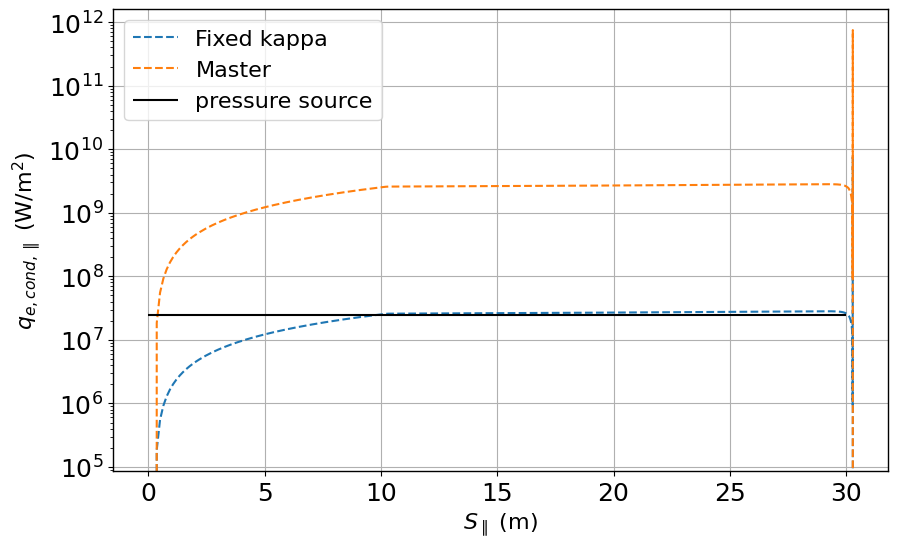

In [54]:
fig,ax = plt.subplots(1, 1, figsize=(10, 6))

def spitzer_electron_simple(dataframe):
    """
    Calculate the Spitzer-Harm heat flux using the simple formula.
    """
    x =dataframe['y']
    Te = dataframe['Te']
    kappa_e = dataframe['kappa_par_e']
    grad_T = np.gradient(Te, x)
    q = -kappa_e * grad_T

    return q



# fixed_kappa['kappa_par_e'].plot(ax=ax, label='Fixed kappa')
# master['kappa_par_e'].plot(ax=ax, label='Master')

q_fixed = spitzer_electron_simple(fixed_kappa)
q_master = spitzer_electron_simple(master)
x = fixed_kappa['y']

plt.plot(x, q_fixed, label='Fixed kappa', linestyle='--')
plt.plot(x, q_master, label='Master', linestyle='--')
plt.hlines(2.5e7,0,30, color = 'black', label = 'pressure source')
plt.xlabel(r'$S_{\parallel}$ (m)')
plt.ylabel(r'$q_{e,cond,{\parallel}}$ (W/m$^2$)')
plt.legend()
# plt.xlim(5,25)
plt.yscale('log')
